In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset

In [24]:
df = pd.read_csv('Add_sales_data_2018.csv')

In [25]:
print(df)

           Date    Add1    Add2    Add3    Add4    Add5    Profit
0     10/8/2018  208.00  222.25  206.85  216.00  215.15  4093.065
1     10/5/2018  217.00  218.60  205.90  210.25  209.20  4042.448
2     10/4/2018  223.50  227.80  216.15  217.25  218.20  4213.819
3     10/3/2018  230.00  237.50  225.75  226.45  227.60  4391.665
4     10/1/2018  234.55  234.60  221.05  230.30  230.90  4350.683
..          ...     ...     ...     ...     ...     ...       ...
200  12/14/2017  288.00  288.25  279.20  284.50  284.30  5374.105
201  12/13/2017  290.00  292.50  282.20  284.80  284.45  5439.655
202  12/12/2017  298.60  298.60  286.65  287.45  287.80  5545.013
203  12/11/2017  290.00  299.55  285.90  297.85  298.35  5565.444
204   12/8/2017  287.55  289.90  285.05  288.05  288.45  5421.842

[205 rows x 7 columns]


In [26]:
df.describe()

,Add1,Add2,Add3,Add4,Add5,Profit
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [27]:
df.shape


(205, 7)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Add1    205 non-null    float64
 2   Add2    205 non-null    float64
 3   Add3    205 non-null    float64
 4   Add4    205 non-null    float64
 5   Add5    205 non-null    float64
 6   Profit  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


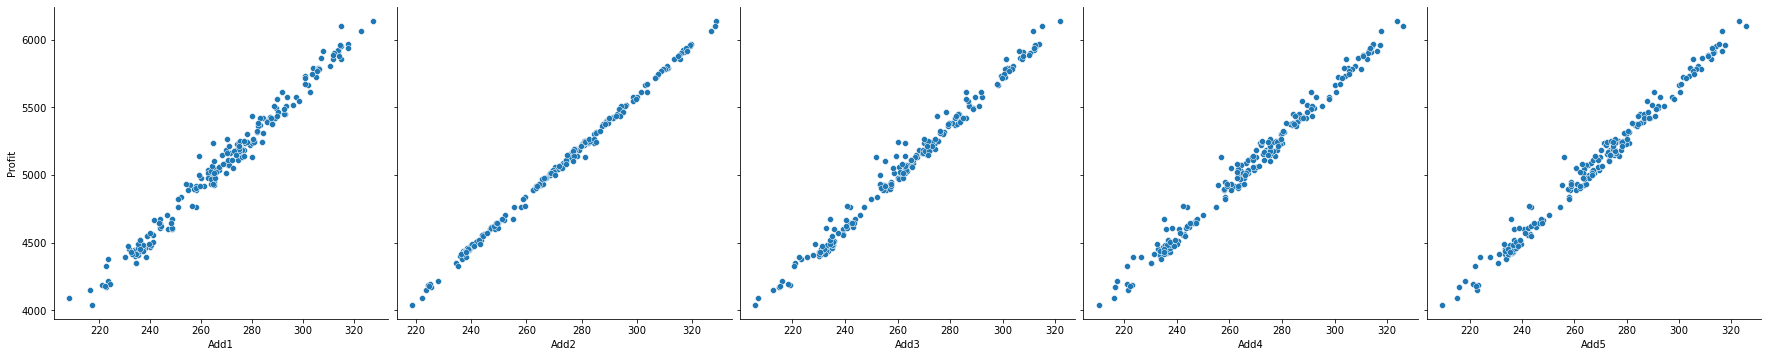

In [30]:
sns.pairplot(df, x_vars=['Add1','Add2','Add3','Add4','Add5'], 
             y_vars='Profit', height=5, aspect=1, kind='scatter')
plt.show()

In [31]:
#From this scatterplot we can infer the correlation between the money spent on advertising and profit generated. 

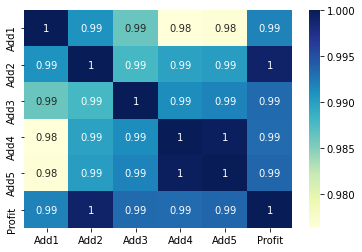

In [32]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [33]:
# The heatmap also shows the correlation between the money spent on advertising and profit generated.

In [34]:
# From This heatmap we can understand that Add2 company is more correlated to profit. So we can take Add2 to perform our simple linear regresion model.

In [35]:
# y= mx+c
# y= c+m*Add2


In [41]:
# Creating X and y
X = df['Add2']
y = df['Profit']

In [42]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 102)

In [44]:
X_train


177    317.00
11     237.20
178    326.90
17     235.15
13     238.00
        ...  
66     270.15
111    293.65
114    287.80
78     270.50
0      222.25
Name: Add2, Length: 143, dtype: float64

In [45]:
y_train

177    5910.980
11     4435.571
178    6062.457
17     4326.782
13     4434.805
         ...   
66     5038.222
111    5491.792
114    5378.379
78     5057.155
0      4093.065
Name: Profit, Length: 143, dtype: float64

In [46]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [47]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const   -49.100461
Add2     18.797252
dtype: float64

In [48]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.201e+04
Date:                Thu, 09 Dec 2021   Prob (F-statistic):          7.38e-197
Time:                        20:04:22   Log-Likelihood:                -639.38
No. Observations:                 143   AIC:                             1283.
Df Residuals:                     141   BIC:                             1289.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.1005     18.001     -2.728      0.007     -84.687     -13.514
Add2          18.7973      0.066    286.367      0.000      18.667      18.927
==============================================================================
Omnibus:                       71.030   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.188
Skew:                          -1.947   Prob(JB):                     3.13e-52
Kurtosis:                       7.965   Cond. No.                     2.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# The coeficient is statistically significant
# The R-squared value is 0.998 which means 99.8% of the profit can be explained by Add2 column using this line.

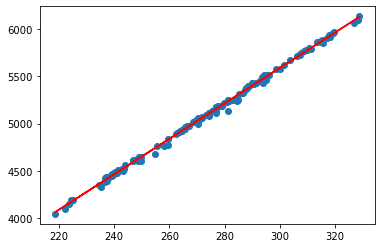

In [51]:
plt.scatter(X_train, y_train)
plt.plot(X_train, -49.1005 + 18.7973*X_train, 'r')
plt.show()

In [52]:
# This is the simple linear regression model for the given data.

In [53]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

C:\Users\allen\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


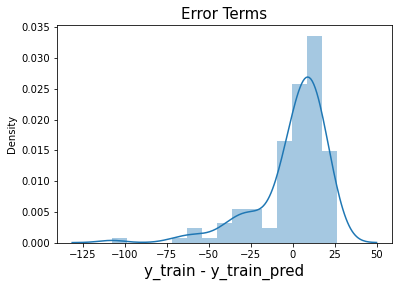

In [56]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

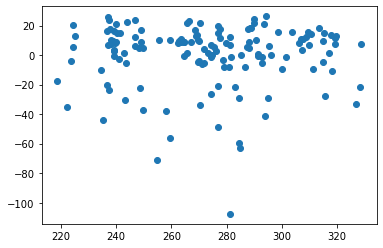

In [57]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [58]:
#From this we can infer that the residual doesn't follow any pattern

In [59]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

82     5020.518343
160    5394.583654
103    5483.870600
139    5296.837944
75     5154.918694
          ...     
50     4542.128286
98     4567.504575
83     4964.126588
85     4939.690161
40     4470.698729
Length: 62, dtype: float64